<a href="https://colab.research.google.com/github/lipichandrakar/Real-Time-Air-Quality-Index-AQI-Monitoring/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('london-air-quality.csv')

In [3]:
print("Columns in the DataFrame:", data.columns)

Columns in the DataFrame: Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')


In [4]:
data.columns = data.columns.str.strip()

In [5]:
numeric_cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [6]:
print(data.isnull().sum())

date      0
pm25     11
pm10     10
o3       46
no2      43
so2     962
co      292
dtype: int64


In [7]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


In [8]:
data['aqi'] = (data['pm25'] * 0.4 + data['pm10'] * 0.3 + data['o3'] * 0.2 +
               data['no2'] * 0.1)

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [11]:
X = data[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
y = data['aqi']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1531.5376 - mae: 37.2974 - val_loss: 1068.2301 - val_mae: 31.3069
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 774.7886 - mae: 25.9092 - val_loss: 162.6638 - val_mae: 10.9292
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.0223 - mae: 9.5870 - val_loss: 87.5801 - val_mae: 7.5540
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.5197 - mae: 7.1026 - val_loss: 60.7675 - val_mae: 6.1781
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.9192 - mae: 5.7474 - val_loss: 45.2451 - val_mae: 5.3075
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.8376 - mae: 4.9780 - val_loss: 33.4170 - val_mae: 4.4953
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30.0703 - mae: 4.1885 - val_loss: 23.9773 - val_mae: 3.7232
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2504 - mae: 3.4883 - val_loss: 17.2961 - val_mae: 3.1335
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [17]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0660 - mae: 0.1658 
Mean Absolute Error: 0.16301387548446655


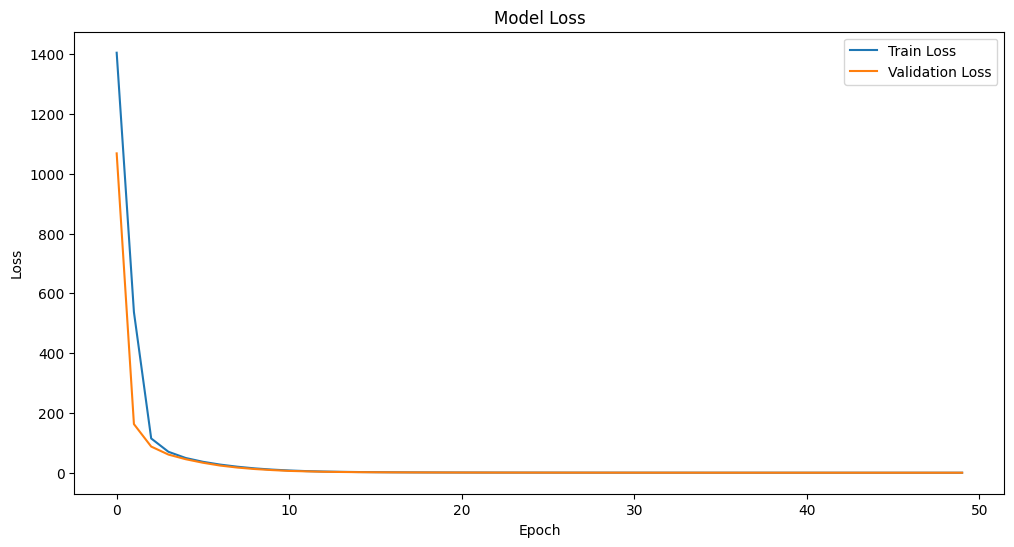

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


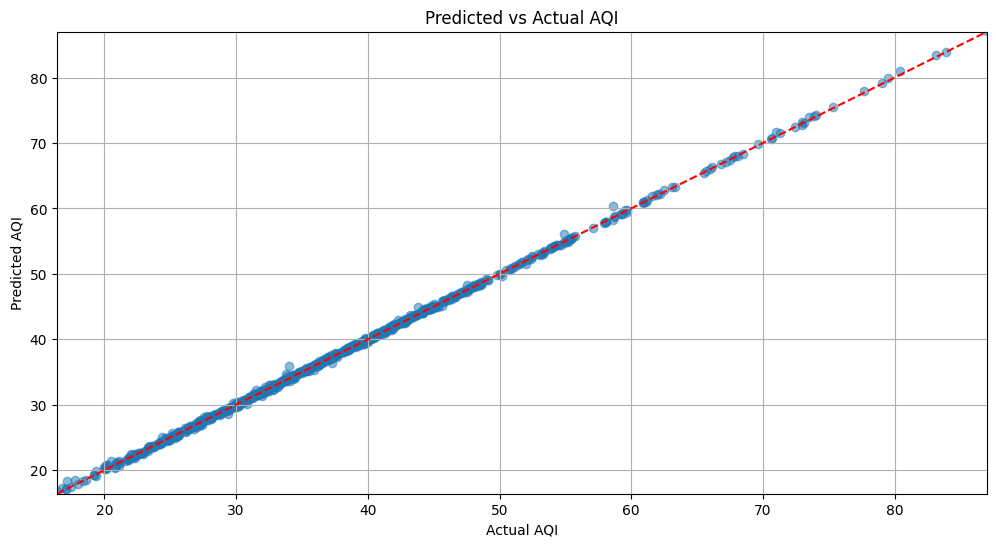

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()

# New Section